In [139]:
#Homework 1
#This homework assignment will use the titanic_train data set found in the dataset folder. You will have a week to complete this assignment. Do all your analysis and answer the questions within a Jupyter notebook. Put the notebook in your GitHub's homework repository.
#1. Read the titanic data set into a pandas dataframe.
#2. Look at the first 5 rows.
#3. What is the size of the data set? (rows and columns)
#4. How many people survived? What percentage of people survived?
#5. What percentage of passengers are male? female?
#6. What is the survival rate of male passengers? female passengers?
#7. How many different cabin classes, Pclass, are there? 
#8. What percent of the passengers are in each class?
#9. What is the survival rate within each class? 
#10. Create a histogram of ages split by sex and survival.
#11. Create a boxplot for age split by class and sex.
#12. For each class create a histogram plot of ages split by suvivor or not. ( You will have one figure for each class. Each figure will have two histograms on it. One for survivors and one for non-survivors where the survivors are colored blue and non-survivors colored red) 
#13. Discuss anything interesting you found. Where there any surprises? Are there any data issues you found? If you wanted to predict survival or not what do you think we be the most useful?import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as p


In [140]:
#Question 1
df = pd.read_csv('https://raw.githubusercontent.com/galvin-mj/DAT_ATL_15/master/Datasets/titanic_train.csv')

In [141]:
#Question 2
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [142]:
#Question 3 -891 rows and 12 cloumns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [143]:
#4 - 38.38% of the passengers survived.  
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [144]:
men = df[df.Sex == 'male']
women = df[df.Sex =='female']

men_survivors = len(men[men.Survived==1])
women_survivors = len(women[women.Survived==1])

survivors = df[df.Survived==1]

In [145]:
#Also Question 4 - 342 survived.  
df.Survived.value_counts()

0    549
1    342
dtype: int64

In [146]:
#6 Females survived at a rate of 74% and males at a rate of 19%.  
df.groupby('Sex').Survived.mean()*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [208]:
#5 - 
df.Sex.value_counts()


male      577
female    314
dtype: int64

In [148]:
#7 Number of Cabin Types
df.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
D                  3
C22 C26            3
E101               3
F2                 3
F33                3
B57 B59 B63 B66    2
C68                2
B58 B60            2
E121               2
D20                2
E8                 2
E44                2
B77                2
C65                2
D26                2
E24                2
E25                2
B20                2
C93                2
D33                2
E67                2
D35                2
D36                2
C52                2
F4                 2
C125               2
C124               2
                  ..
F G63              1
A6                 1
D45                1
D6                 1
D56                1
C101               1
C54                1
D28                1
D37                1
B102               1
D30                1
E17                1
E58                1
F E69              1
D10 D12            1
E50                1
A14          

In [149]:
#7 Number of Classes 
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [203]:
proportion_women_Survived = float(sum(women.Survived))/len(women)
proportion_men_Survived = float(sum(men.Survived))/len(men)

In [152]:
for i in range(1, 4):
    print i, len(df[(df['Sex'] == 'male') & (df['Pclass'] == i)])

1 122
2 108
3 347


In [153]:
for i in range(1, 4):
    print i, len(df[(df['Sex'] == 'female') & (df['Pclass'] == i)])

1 94
2 76
3 144


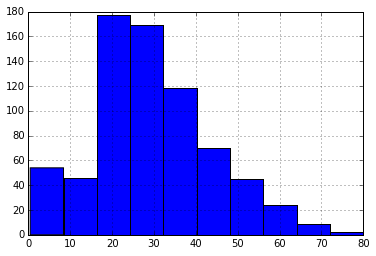

In [154]:
df['Age'].hist()
p.show()

In [209]:
#Question 8


In [197]:
#Question 9
df.groupby('Pclass').Survived.sum()/df.groupby('Pclass').Survived.count()*100



Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

(array([ 17.,   5.,  11.,  29.,  13.,   9.,   6.,   2.,   0.,   1.]),
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 10 Patch objects>)

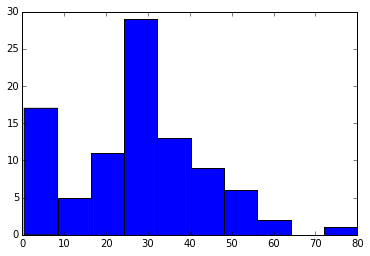

In [160]:
male_survivors = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]
male_surv = male_survivors[np.isfinite(male_survivors['Age'])]
plt.hist(male_surv['Age'].values)
                    
   

(array([ 17.,   4.,  32.,  34.,  32.,  32.,  17.,  13.,   9.,   7.]),
 array([  0.75 ,   6.975,  13.2  ,  19.425,  25.65 ,  31.875,  38.1  ,
         44.325,  50.55 ,  56.775,  63.   ]),
 <a list of 10 Patch objects>)

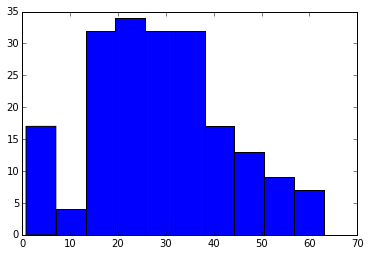

In [162]:
female_survivors = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]
female_surv = female_survivors[np.isfinite(female_survivors['Age'])]
plt.hist(female_surv['Age'].values)

(array([ 11.,   8.,  85.,  95.,  59.,  37.,  32.,  14.,  13.,   6.]),
 array([  1. ,   8.3,  15.6,  22.9,  30.2,  37.5,  44.8,  52.1,  59.4,
         66.7,  74. ]),
 <a list of 10 Patch objects>)

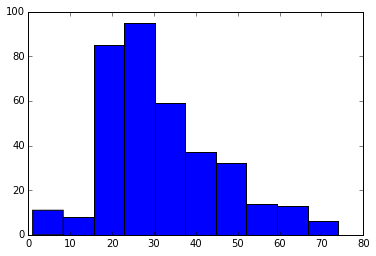

In [163]:
male_survivors = df[(df['Sex'] == 'male') & (df['Survived'] == 0)]
male_surv = male_survivors[np.isfinite(male_survivors['Age'])]
plt.hist(male_surv['Age'].values)   

(array([  6.,   7.,   9.,   8.,  12.,   6.,   5.,   7.,   3.,   1.]),
 array([  2. ,   7.5,  13. ,  18.5,  24. ,  29.5,  35. ,  40.5,  46. ,
         51.5,  57. ]),
 <a list of 10 Patch objects>)

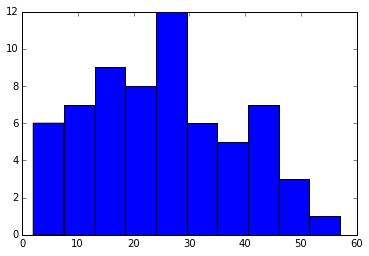

In [164]:
female_survivors = df[(df['Sex'] == 'female') & (df['Survived'] == 0)]
female_surv = female_survivors[np.isfinite(female_survivors['Age'])]
plt.hist(female_surv['Age'].values)

{'boxes': [<matplotlib.lines.Line2D at 0x139fa128>],
 'caps': [<matplotlib.lines.Line2D at 0x139faeb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x13a07f60>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x13a079e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x139fa358>,
  <matplotlib.lines.Line2D at 0x139fa940>]}

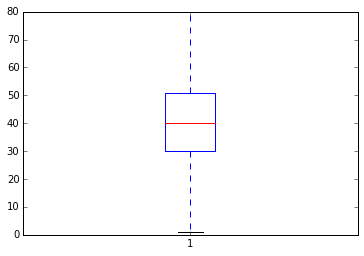

In [174]:
male_firstclass = df[(df['Sex'] == 'male') & (df['Pclass'] == 1)]
Pclass_mfc = male_firstclass[np.isfinite(male_firstclass['Age'])]
plt.boxplot(Pclass_mfc['Age'].values)

{'boxes': [<matplotlib.lines.Line2D at 0x13c4fc18>],
 'caps': [<matplotlib.lines.Line2D at 0x13c5e9e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x13c6ca90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x13c6c518>],
 'whiskers': [<matplotlib.lines.Line2D at 0x13c4fe48>,
  <matplotlib.lines.Line2D at 0x13c5e470>]}

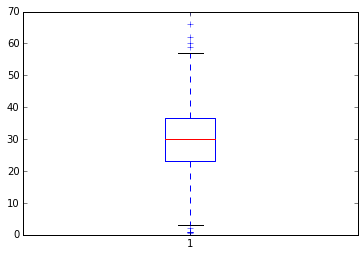

In [175]:
male_secondclass = df[(df['Sex'] == 'male') & (df['Pclass'] == 2)]
Pclass_msc = male_secondclass[np.isfinite(male_secondclass['Age'])]
plt.boxplot(Pclass_msc['Age'].values)

{'boxes': [<matplotlib.lines.Line2D at 0x13ce26d8>],
 'caps': [<matplotlib.lines.Line2D at 0x13e484a8>,
 'fliers': [<matplotlib.lines.Line2D at 0x13e56550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x13e48f98>],
 'whiskers': [<matplotlib.lines.Line2D at 0x13ce2908>,
  <matplotlib.lines.Line2D at 0x13ce2ef0>]}

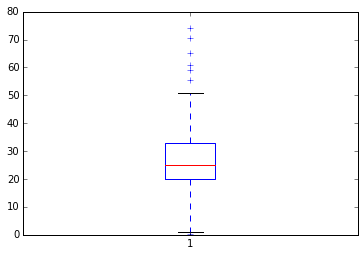

In [177]:
male_thirdclass = df[(df['Sex'] == 'male') & (df['Pclass'] == 3)]
Pclass_mtc = male_thirdclass[np.isfinite(male_thirdclass['Age'])]
plt.boxplot(Pclass_mtc['Age'].values)

{'boxes': [<matplotlib.lines.Line2D at 0x14066358>],
 'caps': [<matplotlib.lines.Line2D at 0x140b7128>,
 'fliers': [<matplotlib.lines.Line2D at 0x140c41d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x140b7c18>],
 'whiskers': [<matplotlib.lines.Line2D at 0x14066588>,
  <matplotlib.lines.Line2D at 0x14066b70>]}

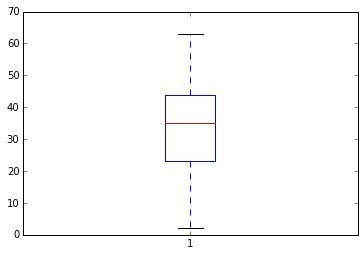

In [178]:
female_firstclass = df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]
Pclass_ffc = female_firstclass[np.isfinite(female_firstclass['Age'])]
plt.boxplot(Pclass_ffc['Age'].values)

{'boxes': [<matplotlib.lines.Line2D at 0x14232f60>],
 'caps': [<matplotlib.lines.Line2D at 0x14242d30>,
 'fliers': [<matplotlib.lines.Line2D at 0x14291dd8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x14291860>],
 'whiskers': [<matplotlib.lines.Line2D at 0x142421d0>,
  <matplotlib.lines.Line2D at 0x142427b8>]}

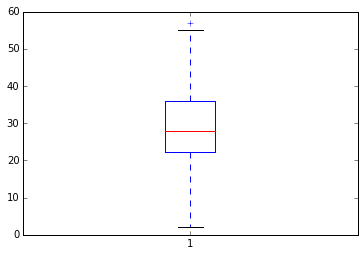

In [179]:
female_secondclass = df[(df['Sex'] == 'female') & (df['Pclass'] == 2)]
Pclass_fsc = female_secondclass[np.isfinite(female_secondclass['Age'])]
plt.boxplot(Pclass_fsc['Age'].values)

{'boxes': [<matplotlib.lines.Line2D at 0x1446d400>],
 'caps': [<matplotlib.lines.Line2D at 0x1447d1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1448a278>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1447dcc0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1446d630>,
  <matplotlib.lines.Line2D at 0x1446dc18>]}

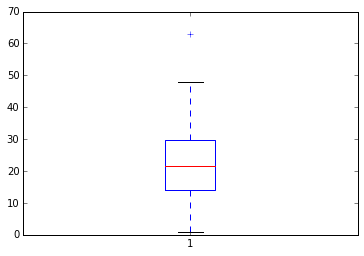

In [180]:
female_thirdclass = df[(df['Sex'] == 'female') & (df['Pclass'] == 3)]
Pclass_ftc = female_thirdclass[np.isfinite(female_thirdclass['Age'])]
plt.boxplot(Pclass_ftc['Age'].values)

(array([  2.,   6.,  23.,  20.,  32.,  15.,  16.,   7.,   0.,   1.]),
 array([  0.92 ,   8.828,  16.736,  24.644,  32.552,  40.46 ,  48.368,
         56.276,  64.184,  72.092,  80.   ]),
 <a list of 10 Patch objects>)

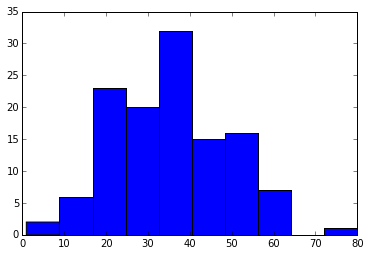

In [183]:
firstclass_survivors = df[(df['Pclass'] == 1) & (df['Survived'] == 1)]
firstclass_surv = firstclass_survivors[np.isfinite(firstclass_survivors['Age'])]
plt.hist(firstclass_surv['Age'].values)

(array([ 14.,   3.,   9.,  12.,  15.,  14.,   7.,   3.,   5.,   1.]),
 array([  0.67 ,   6.803,  12.936,  19.069,  25.202,  31.335,  37.468,
         43.601,  49.734,  55.867,  62.   ]),
 <a list of 10 Patch objects>)

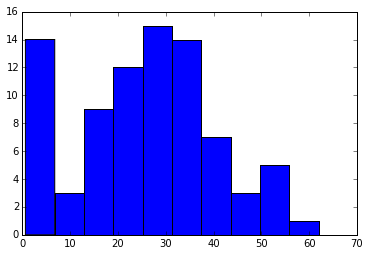

In [184]:
secondclass_survivors = df[(df['Pclass'] == 2) & (df['Survived'] == 1)]
secondclass_surv = secondclass_survivors[np.isfinite(secondclass_survivors['Age'])]
plt.hist(secondclass_surv['Age'].values)

(array([ 17.,   3.,  16.,  17.,  19.,   8.,   3.,   1.,   0.,   1.]),
 array([  0.42 ,   6.678,  12.936,  19.194,  25.452,  31.71 ,  37.968,
         44.226,  50.484,  56.742,  63.   ]),
 <a list of 10 Patch objects>)

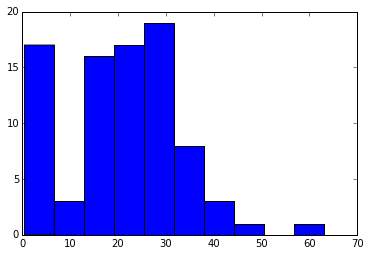

In [185]:
thirdclass_survivors = df[(df['Pclass'] == 3) & (df['Survived'] == 1)]
thirdclass_surv = thirdclass_survivors[np.isfinite(thirdclass_survivors['Age'])]
plt.hist(thirdclass_surv['Age'].values)

(array([  1.,   0.,   5.,   8.,   6.,   8.,  15.,   7.,   9.,   5.]),
 array([  2. ,   8.9,  15.8,  22.7,  29.6,  36.5,  43.4,  50.3,  57.2,
         64.1,  71. ]),
 <a list of 10 Patch objects>)

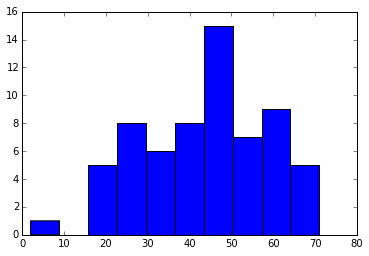

In [186]:
firstclass_survivors = df[(df['Pclass'] == 1) & (df['Survived'] == 0)]
firstclass_surv = firstclass_survivors[np.isfinite(firstclass_survivors['Age'])]
plt.hist(firstclass_surv['Age'].values)

(array([ 12.,  17.,  21.,  15.,   6.,   6.,   4.,   6.,   1.,   2.]),
 array([ 16. ,  21.4,  26.8,  32.2,  37.6,  43. ,  48.4,  53.8,  59.2,
         64.6,  70. ]),
 <a list of 10 Patch objects>)

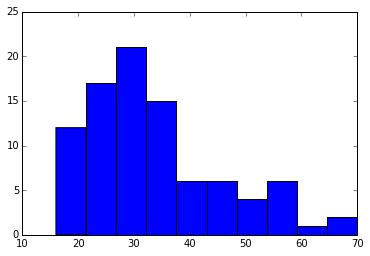

In [187]:
secondclass_survivors = df[(df['Pclass'] == 2) & (df['Survived'] == 0)]
secondclass_surv = secondclass_survivors[np.isfinite(secondclass_survivors['Age'])]
plt.hist(secondclass_surv['Age'].values)

(array([ 17.,  16.,  82.,  68.,  37.,  29.,  15.,   2.,   2.,   2.]),
 array([  1. ,   8.3,  15.6,  22.9,  30.2,  37.5,  44.8,  52.1,  59.4,
         66.7,  74. ]),
 <a list of 10 Patch objects>)

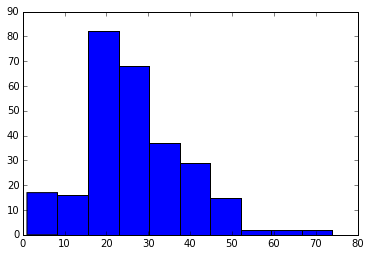

In [190]:
thirdclass_survivors = df[(df['Pclass'] == 3) & (df['Survived'] == 0)]
thirdclass_surv = thirdclass_survivors[np.isfinite(thirdclass_survivors['Age'])]
plt.hist(thirdclass_surv['Age'].values)

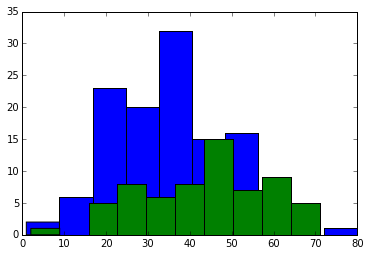

In [193]:
firstclass_survivors = df[(df['Pclass'] == 1) & (df['Survived'] == 1)]
firstclass_surv = firstclass_survivors[np.isfinite(firstclass_survivors['Age'])]
plt.hist(firstclass_surv['Age'].values)

firstclass_survivors = df[(df['Pclass'] == 1) & (df['Survived'] == 0)]
firstclass_surv = firstclass_survivors[np.isfinite(firstclass_survivors['Age'])]
plt.hist(firstclass_surv['Age'].values)

color = 'blue' if 'Survived' else 'red'

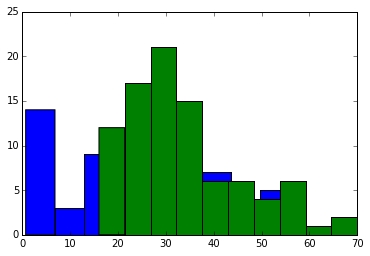

In [194]:
secondclass_survivors = df[(df['Pclass'] == 2) & (df['Survived'] == 1)]
secondclass_surv = secondclass_survivors[np.isfinite(secondclass_survivors['Age'])]
plt.hist(secondclass_surv['Age'].values)

secondclass_survivors = df[(df['Pclass'] == 2) & (df['Survived'] == 0)]
secondclass_surv = secondclass_survivors[np.isfinite(secondclass_survivors['Age'])]
plt.hist(secondclass_surv['Age'].values)

color = 'blue' if 'Survived' else 'red'


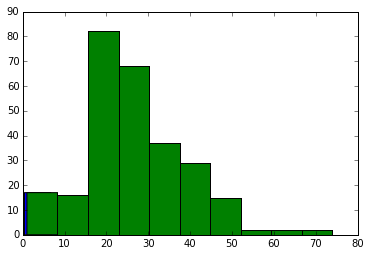

In [195]:
thirdclass_survivors = df[(df['Pclass'] == 3) & (df['Survived'] == 1)]
thirdclass_surv = thirdclass_survivors[np.isfinite(thirdclass_survivors['Age'])]
plt.hist(thirdclass_surv['Age'].values)


thirdclass_survivors = df[(df['Pclass'] == 3) & (df['Survived'] == 0)]
thirdclass_surv = thirdclass_survivors[np.isfinite(thirdclass_survivors['Age'])]
plt.hist(thirdclass_surv['Age'].values)

color = 'blue' if 'Survived' else 'red'